
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_quast_reports
as input, and produces panels for figure 1.

Execution directory:  /home/local/work/code/github/project-male-assembly/notebooks/plotting/assm_stats
Working directory:  /home/local/work/code/github/project-male-assembly/notebooks/plotting/assm_stats
Output directory:  /home/local/work/data/sig_chrY/paper/output/figures


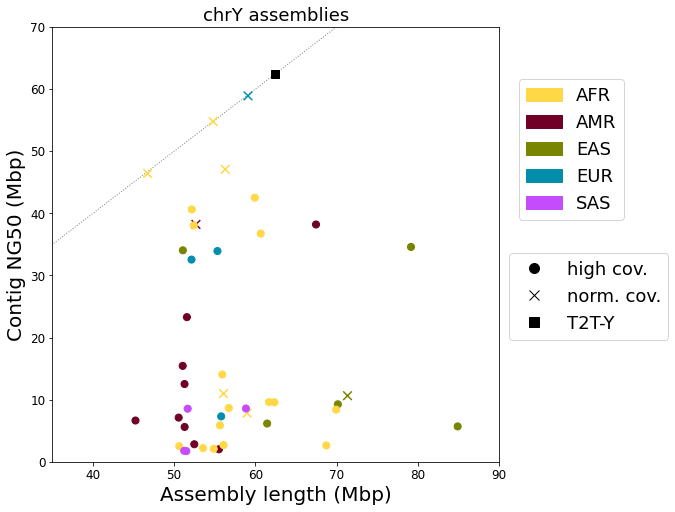

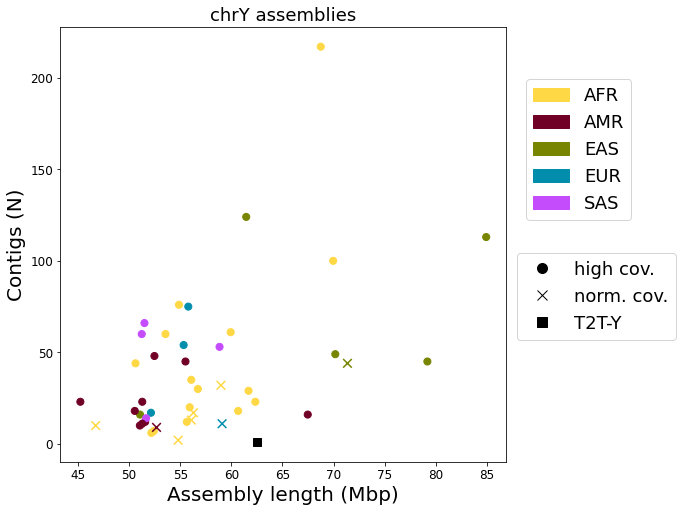

In [47]:
%matplotlib inline
import pathlib as pl

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

desc="""
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_quast_reports
as input, and produces panels for figure 1.
"""

print(desc)

repo_dir = pl.Path('/home/local/work/code/github/project-male-assembly').resolve(strict=True)
exec_dir = pl.Path('.').resolve(strict=True)
wd_dir = exec_dir
out_dir = pl.Path('/home/local/work/data/sig_chrY/paper/output/figures').resolve(strict=True)

print('Execution directory: ', exec_dir)
print('Working directory: ', wd_dir)
print('Output directory: ', out_dir)
print('=================================')

quast_table_dir = pl.Path(
    '/home/local/work/data/sig_chrY/paper/stats/quast_reports'
).resolve(strict=True)

table_file = quast_table_dir / pl.Path('SAMPLES.HIFIRW.ONTUL.na.chrY.quast-report.tsv')
table_file = table_file.resolve(strict=True)

annotations_file = repo_dir / pl.Path('data/sample_pop_color.tsv')
colors = pd.read_csv(annotations_file, sep='\t', header=0)

df = pd.read_csv(table_file, sep='\t', header=0)
drop_samples = [
    'HG02666',
    'HG01457',
    'NA19384',
    'NA18989',
    'NA24385'
]
df = df.loc[~df['sample'].isin(drop_samples), :].copy().reset_index(inplace=False, drop=True)
colors = colors.loc[colors['workflow_sample'].isin(df['sample']), :].copy()

hprc_samples = """
HG03579
HG01952
HG01243
HG00673
HG03492
HG01358
HG01258
HG02572
HG02717
HG01928
HG01106
HG00621
HG01109
HG02486
HG03471
"""
hprc_samples = hprc_samples.strip().split()

hprc = df.loc[df['sample'].isin(hprc_samples), :].copy()
# color: royalblue
hgsvc = df.loc[~df['sample'].isin(hprc_samples), :].copy()

high_cov = [
    'HG01890',
    'HC02666',
    'HC01457',
    'HC18989',
    'HC19384',
    'NA19317',
    'NA19347',
    'HG00358'
]

hgsvc_hc = hgsvc.loc[hgsvc['sample'].isin(high_cov), :].copy()
# color: limegreen
hgsvc_nm = hgsvc.loc[~hgsvc['sample'].isin(high_cov), :].copy()
# color: limegreen

# 2022-07-26 change coloring to super population,
# distinguish high-coverage from regular coverage
# by marker style
highcov = df.loc[df['sample'].isin(high_cov), :].copy()
highcov_colors = colors.loc[colors['workflow_sample'].isin(high_cov), :].copy()

highcov = highcov.merge(highcov_colors, left_on='sample', right_on='workflow_sample', how='outer')
highcov_colors = [
    (
        round(row.superpop_color_red, 3),
        round(row.superpop_color_green, 3),
        round(row.superpop_color_blue, 3)
    ) for row in \
    highcov.itertuples()
]

normcov = df.loc[~df['sample'].isin(high_cov), :].copy()
normcov_colors = colors.loc[~colors['workflow_sample'].isin(high_cov), :].copy()
normcov = normcov.merge(normcov_colors, left_on='sample', right_on='workflow_sample', how='outer')
normcov_colors = [
    (
        round(row.superpop_color_red, 3),
        round(row.superpop_color_green, 3),
        round(row.superpop_color_blue, 3)
    ) for row in \
    normcov.itertuples()
]

marker_legend = [
    Line2D([0], [0], color='black', marker='o', lw=0, label='high cov.', ms=10),
    Line2D([0], [0], color='black', marker='x', lw=0, label='norm. cov.', ms=10),
    Line2D([0], [0], color='black', marker='s', lw=0, label='T2T-Y', ms=10),
]

spop_colors = colors.drop_duplicates('super_population').sort_values('super_population', inplace=False)
color_legend = []
for row in spop_colors.itertuples():
    r = round(row.superpop_color_red, 3)
    g = round(row.superpop_color_green, 3)
    b = round(row.superpop_color_blue, 3)
    color_legend.append(
        Patch(facecolor=(r,g,b), edgecolor=(r,g,b), label=row.super_population),
    )


fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'fig1_panel_assm_ng50-v-length'

ax.scatter(
    highcov['assembly_length_bp'] / 1e6,
    highcov['contig_NG50'] / 1e6,
    s=75,
    c=highcov_colors,
    label='high cov.',
    marker='x'
)

ax.scatter(
    normcov['assembly_length_bp'] / 1e6,
    normcov['contig_NG50'] / 1e6,
    s=50,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

# ax.scatter(
#     hgsvc_nm['assembly_length_bp'] / 1e6,
#     hgsvc_nm['contig_NG50'] / 1e6,
#     s=50,
#     c='limegreen',
#     label='HGSVC',
#     marker='o'
# )

ax.scatter(
    [62460029 / 1e6],
    [62460029 / 1e6],
    s=50,
    c='black',
    label='T2T-Y',
    marker='s'
)

ax.plot([0, 90], [0, 90], ls='dotted', c='grey', lw=1, zorder=0)
ax.set_xlim(35, 90)
ax.set_ylim(0, 70)

ax.set_title('chrY assemblies', fontsize=18)
ax.set_xlabel('Assembly length (Mbp)', fontsize=20)
ax.set_ylabel('Contig NG50 (Mbp)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend, loc='best', fontsize=18)
leg1.set_bbox_to_anchor((1.4, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

plt.savefig(
    out_dir / pl.Path(f'{fig_name}.png'),
    dpi=150, bbox_inches='tight', transparent=False,
    bbox_extra_artists=[leg1, leg2]
)
plt.savefig(
    out_dir / pl.Path(f'{fig_name}.pdf'),
    bbox_inches='tight', transparent=False,
    bbox_extra_artists=[leg1, leg2]
)

#################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'fig1_panel_nctg-v-length'

ax.scatter(
    normcov['assembly_length_bp'] / 1e6,
    normcov['contigs_num'],
    s=50,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.scatter(
    highcov['assembly_length_bp'] / 1e6,
    highcov['contigs_num'],
    s=75,
    c=highcov_colors,
    label='high cov.',
    marker='x'
)

# ax.scatter(
#     hgsvc_nm['assembly_length_bp'] / 1e6,
#     hgsvc_nm['contigs_num'],
#     s=50,
#     c='limegreen',
#     label='HGSVC',
#     marker='o'
# )

ax.scatter(
    [62460029 / 1e6],
    [1],
    s=50,
    c='black',
    label='T2T-Y',
    marker='s'
)

#ax.plot([0, 90], [0, 90], ls='dotted', c='grey', lw=1, zorder=0)
# ax.set_xlim(35, 90)
# ax.set_ylim(0, 70)
#ax.text(65, 205, 'NA19239', {'fontsize': 12})
#ax.text(80, 120, 'HG00512', {'fontsize': 12})
ax.set_title('chrY assemblies', fontsize=18)
ax.set_xlabel('Assembly length (Mbp)', fontsize=20)
ax.set_ylabel('Contigs (N)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend, loc='best', fontsize=18)
leg1.set_bbox_to_anchor((1.4, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

plt.savefig(
    out_dir / pl.Path(f'{fig_name}.png'),
    dpi=150, bbox_inches='tight', transparent=False,
    bbox_extra_artists=[leg1, leg2]
)

plt.savefig(
    out_dir / pl.Path(f'{fig_name}.pdf'),
    bbox_inches='tight', transparent=False,
    bbox_extra_artists=[leg1, leg2]
)

